* INCLUDE mixed donor sample
* REMOVED 5-prime sample
* Add lower filtering threshhold for 'total_counts' (not only 'n_genes')
* Add AVN samples 

## Import modules

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import scrublet as scr
import session_info

In [2]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')
session_info.show()

## Read in anndata

In [3]:
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/8regions/QC/multiome_RNA_adult_prefilter.h5ad')
adata

AnnData object with n_obs × n_vars = 235093 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval'
    var: 'gene_name', 'feature_type', 'ambient_expression-0', 'ambient_expression-1', 'ambient_expression-10', 'ambient_expression-11', 'ambient_expression-12', 'ambient_expression-13', 'ambient_expression-14', 'ambient_expression-15', 'ambient_expression-16', 'ambient_expression-17', 'ambient_expression-18', 'ambient_expression-19', 'ambient_expression-2', 'ambient_expression-20', 'ambient_expression-21', 'ambient_expression-22', 'ambient_expression-23', 'ambient_expression-24', 'ambient_expression-25', 'ambient_expression-26', 'ambient_expression-27', 'ambient_expression-28', 'ambient_expression-29', 'ambient

In [4]:
adata.obs['combinedID'].value_counts()

HCAHeartST11350194_HCAHeartST11445771    18132
HCAHeartST11064577_HCAHeartST11023242    17528
HCAHeartST10773168_HCAHeartST10781065    15618
HCAHeartST10773171_HCAHeartST10781448    15000
HCAHeartST10773166_HCAHeartST10781063    14353
HCAHeartST10773170_HCAHeartST10781447    13330
HCAHeart9508628_HCAHeart9508820          12703
HCAHeart9508629_HCAHeart9508821          10389
HCAHeartST11350192_HCAHeartST11445769     9707
HCAHeart9845434_HCAHeart9917176           9401
HCAHeart9845431_HCAHeart9917173           9020
HCAHeart9845436_HCAHeart9917178           8517
HCAHeartST10773167_HCAHeartST10781064     7800
HCAHeart9845435_HCAHeart9917177           7681
HCAHeartST11350195_HCAHeartST11445772     7333
HCAHeartST11064575_HCAHeartST11023240     7141
HCAHeartST10773165_HCAHeartST10781062     6743
HCAHeartST11350197_HCAHeartST11445774     6469
HCAHeartST11350198_HCAHeartST11445775     6090
HCAHeart9845433_HCAHeart9917175           5031
HCAHeart9845432_HCAHeart9917174           4583
HCAHeartST107

## Remove doublets

<AxesSubplot:>

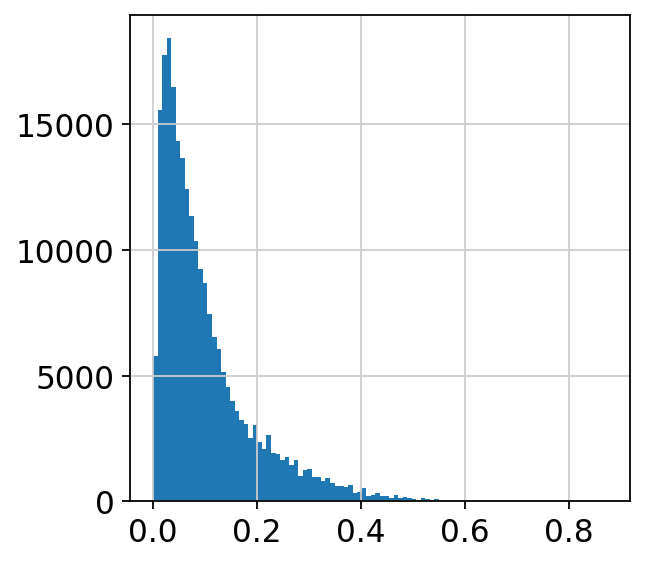

In [5]:
adata.obs['scrublet_score'].hist(bins=100)

In [6]:
# set threshold (arbitrary)
dbl_score_thresh=0.3

prop = np.sum(adata.obs['scrublet_score']>=dbl_score_thresh)/len(adata)
print(f'proportion of doublets: {prop}')

proportion of doublets: 0.050975571369628186


In [7]:
# Remove doublets
adata = adata[adata.obs['scrublet_score']<dbl_score_thresh]
adata

View of AnnData object with n_obs × n_vars = 223109 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval'
    var: 'gene_name', 'feature_type', 'ambient_expression-0', 'ambient_expression-1', 'ambient_expression-10', 'ambient_expression-11', 'ambient_expression-12', 'ambient_expression-13', 'ambient_expression-14', 'ambient_expression-15', 'ambient_expression-16', 'ambient_expression-17', 'ambient_expression-18', 'ambient_expression-19', 'ambient_expression-2', 'ambient_expression-20', 'ambient_expression-21', 'ambient_expression-22', 'ambient_expression-23', 'ambient_expression-24', 'ambient_expression-25', 'ambient_expression-26', 'ambient_expression-27', 'ambient_expression-28', 'ambient_expression-29', 

## Remove low quality cells

In [8]:
sc.pp.filter_cells(adata, min_genes=200, inplace=True)
sc.pp.filter_cells(adata, min_counts=500, inplace=True)
adata.shape

filtered out 17824 cells that have less than 200 genes expressed
Trying to set attribute `.obs` of view, copying.
filtered out 8916 cells that have less than 500 counts


(196369, 36601)

In [9]:
adata.obs['combinedID'].value_counts()

HCAHeartST11350194_HCAHeartST11445771    16025
HCAHeartST11064577_HCAHeartST11023242    15067
HCAHeartST10773168_HCAHeartST10781065    13919
HCAHeartST10773166_HCAHeartST10781063    12478
HCAHeartST10773170_HCAHeartST10781447    12430
HCAHeart9508628_HCAHeart9508820          11102
HCAHeart9508629_HCAHeart9508821           9728
HCAHeart9845434_HCAHeart9917176           8521
HCAHeartST11350192_HCAHeartST11445769     8191
HCAHeart9845431_HCAHeart9917173           8002
HCAHeart9845436_HCAHeart9917178           7591
HCAHeartST10773167_HCAHeartST10781064     7039
HCAHeart9845435_HCAHeart9917177           6970
HCAHeartST11350195_HCAHeartST11445772     6321
HCAHeartST10773165_HCAHeartST10781062     6189
HCAHeartST11064575_HCAHeartST11023240     6147
HCAHeartST11350197_HCAHeartST11445774     5972
HCAHeartST11350198_HCAHeartST11445775     5381
HCAHeart9845433_HCAHeart9917175           4698
HCAHeart9845432_HCAHeart9917174           4310
HCAHeartST10773169_HCAHeartST10781446     4015
HCAHeart95086

## Compute QC stats

In [10]:
adata.var['mt'] = adata.var['gene_name'].str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['ribo'] = adata.var['gene_name'].str.startswith('RPS','RPL')  # annotate the group of ribosomal genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo'], percent_top=None, log1p=False, inplace=True)

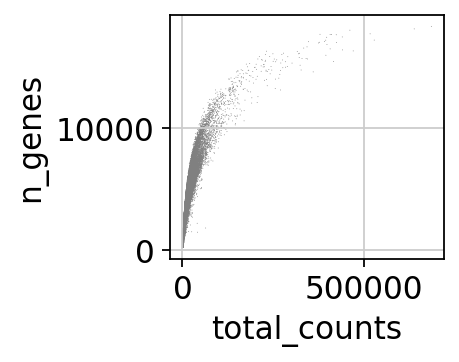

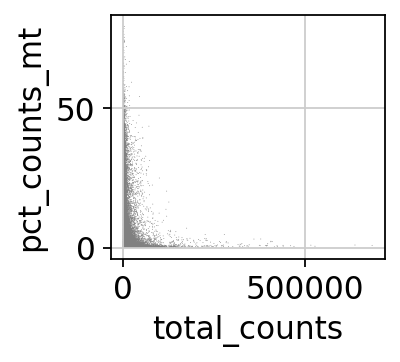

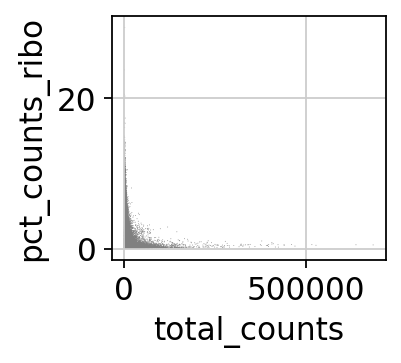

In [11]:
plt.rcParams['figure.figsize'] = [3, 2]

sc.pl.scatter(adata, x='total_counts', y='n_genes')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_ribo')

In [12]:
adata.shape

(196369, 36601)

## Remove cells exceeding the ribo/mito threshold

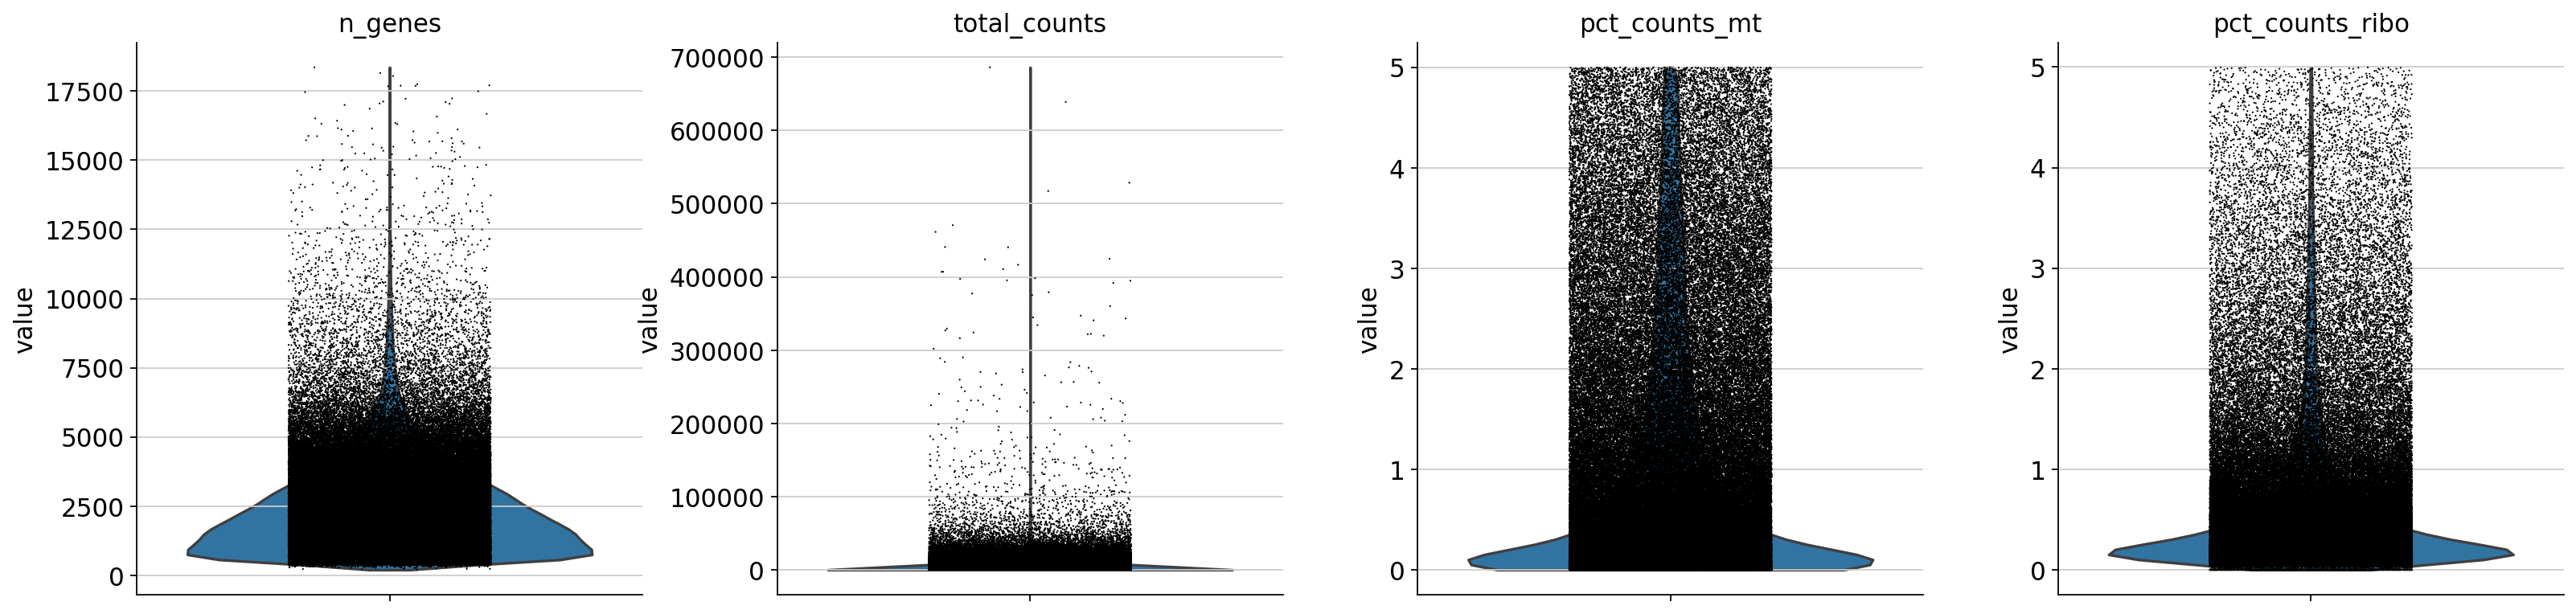

In [13]:
plt.rcParams['figure.figsize'] = [2, 2]
adata = adata[adata.obs['pct_counts_mt'] < 5, :]
adata = adata[adata.obs['pct_counts_ribo'] < 5, :]
sc.pl.violin(adata, ['n_genes', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],jitter = 0.2, multi_panel = True)

In [14]:
adata.obs['combinedID'].value_counts()

HCAHeartST11350194_HCAHeartST11445771    14718
HCAHeartST11064577_HCAHeartST11023242    14108
HCAHeart9508628_HCAHeart9508820          10908
HCAHeart9508629_HCAHeart9508821           9556
HCAHeartST10773170_HCAHeartST10781447     9189
HCAHeartST10773166_HCAHeartST10781063     8615
HCAHeartST10773168_HCAHeartST10781065     8576
HCAHeart9845434_HCAHeart9917176           7848
HCAHeart9845431_HCAHeart9917173           7394
HCAHeart9845436_HCAHeart9917178           6688
HCAHeartST11350192_HCAHeartST11445769     6507
HCAHeart9845435_HCAHeart9917177           6286
HCAHeartST11350195_HCAHeartST11445772     5760
HCAHeartST11064575_HCAHeartST11023240     5664
HCAHeart9845433_HCAHeart9917175           4613
HCAHeartST10773167_HCAHeartST10781064     4393
HCAHeartST10773165_HCAHeartST10781062     4353
HCAHeart9845432_HCAHeart9917174           4202
HCAHeartST11350198_HCAHeartST11445775     4183
HCAHeartST11350197_HCAHeartST11445774     4102
HCAHeart9508627_HCAHeart9508819           3436
HCAHeartST107

## Save

In [15]:
adata.write('/nfs/team205/heart/anndata_objects/8regions/QC/multiome_RNA_adult.h5ad')
adata

View of AnnData object with n_obs × n_vars = 164133 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_name', 'feature_type', 'ambient_expression-0', 'ambient_expression-1', 'ambient_expression-10', 'ambient_expression-11', 'ambient_expression-12', 'ambient_expression-13', 'ambient_expression-14', 'ambient_expression-15', 'ambient_expression-16', 'ambient_expression-17', 'ambient_expression-18', 'ambient_expression-19', 'ambient_expression-2', 'ambient_expression-20', 'ambient_expression-21', 'ambient_expression-22', 'ambient_expression-23', 'ambient_expre

In [16]:
adata.obs['donor'].value_counts()

AH1        60146
A61        40769
D8         37031
D7         20464
D3          3436
AH1-A61     2287
Name: donor, dtype: int64